In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.8 MB/s 
     |████████████████████████████████| 6.3 MB 26.7 MB/s 
     |████████████████████████████████| 15.4 MB 21.8 MB/s 


In [ ]:
import geopandas

In [ ]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
train = pd.read_csv("flights_train.csv")
test = pd.read_csv("flights_test.csv")
submit_sample = pd.read_csv("submit_sample.csv")

In [ ]:
storms = pd.read_excel("StormEvents2015 - Copy.xlsx")
winds = pd.read_excel("2015_windV1.xlsx")

# New section

In [ ]:
train.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5.0,2354.0,21.0,15.0,205.0,1448.0,430.0,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10.0,2.0,12.0,14.0,280.0,2330.0,750.0,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20.0,18.0,16.0,34.0,286.0,2296.0,806.0,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20.0,15.0,15.0,30.0,285.0,2342.0,805.0,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25.0,24.0,11.0,35.0,235.0,1448.0,320.0,-21.0


In [ ]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
gdf = geopandas.GeoDataFrame(
    airports, geometry=geopandas.points_from_xy(airports.LONGITUDE, airports.LATITUDE))

In [ ]:
gdf.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,geometry
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,POINT (-75.44040 40.65236)
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,POINT (-99.68190 32.41132)
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,POINT (-106.60919 35.04022)
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,POINT (-98.42183 45.44906)
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,POINT (-84.19447 31.53552)


In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

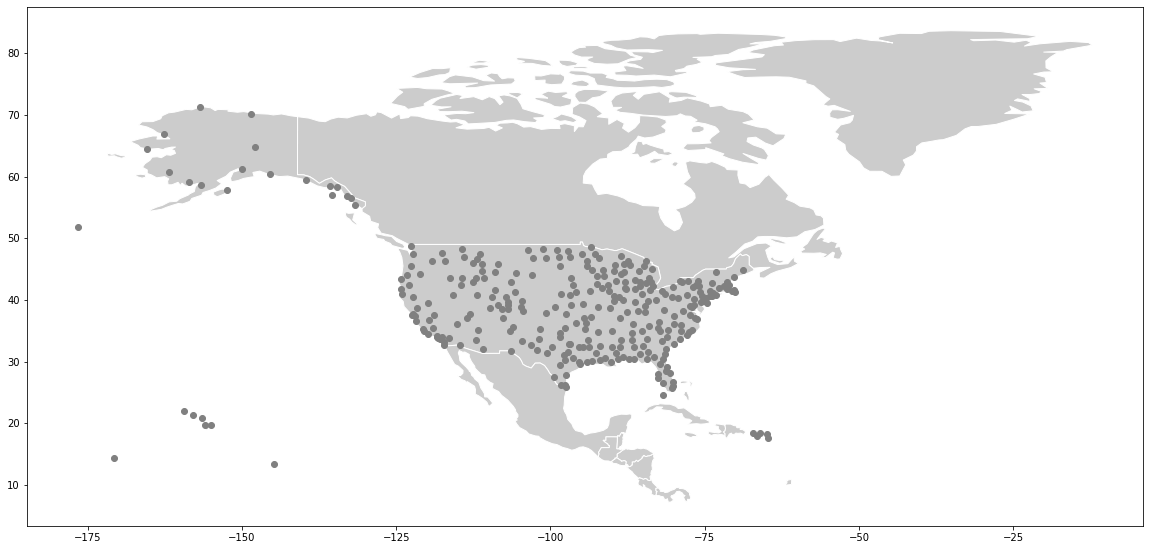

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

# We restrict to South America.
ax = world[world.continent == 'North America'].plot(figsize = (20,20), color ='#CCCCCC', edgecolor = 'white')

gdf.plot(ax=ax, color='grey')

plt.show()

In [ ]:
storms

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
0,201501,27,1200,201501,28,400,92561,NEW HAMPSHIRE,33,2015,January,Winter Storm,Z,12,GYX,2015-01-27 12:00:00,EST-5,2015-01-28 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201501,24,700,201501,24,2100,92625,NEW HAMPSHIRE,33,2015,January,Heavy Snow,Z,12,GYX,2015-01-24 07:00:00,EST-5,2015-01-24 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201501,27,600,201501,27,1200,92561,NEW HAMPSHIRE,33,2015,January,Blizzard,Z,12,GYX,2015-01-27 06:00:00,EST-5,2015-01-27 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201502,14,800,201502,15,1700,93895,NEW HAMPSHIRE,33,2015,February,Heavy Snow,Z,12,GYX,2015-02-14 08:00:00,EST-5,2015-02-15 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201502,7,2200,201502,10,500,93902,NEW HAMPSHIRE,33,2015,February,Heavy Snow,Z,12,GYX,2015-02-07 22:00:00,EST-5,2015-02-10 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42192,201506,1,0,201506,30,2359,96111,ARKANSAS,5,2015,June,Flood,C,81,SHV,2015-06-01 00:00:00,CST-6,2015-06-30 23:59:00,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,S,LANESPORT,2.0,NNW,LANESPORT,335861.0,-944852.0,336708.0,-944852.0
42193,201506,1,0,201506,30,2359,96079,OKLAHOMA,40,2015,June,Flood,C,89,SHV,2015-06-01 00:00:00,CST-6,2015-06-30 23:59:00,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,WSW,FARMERS HILL,2.0,WSW,VALLIANT,338899.0,-951498.0,340051.0,-951526.0
42194,201506,1,0,201506,30,2359,96082,TEXAS,48,2015,June,Flood,C,387,SHV,2015-06-01 00:00:00,CST-6,2015-06-30 23:59:00,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NW,KANAWHA,2.0,SE,RIVER VIEW,339275.0,-953064.0,336941.0,-947413.0
42195,201506,1,0,201506,14,1835,96111,ARKANSAS,5,2015,June,Flood,C,91,SHV,2015-06-01 00:00:00,CST-6,2015-06-14 18:35:00,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,ESE,SMITHVILLE,2.0,SSE,KIBLAH,330181.0,-937491.0,330227.0,-938809.0


In [ ]:
storms['EVENT_CATEGORY'] = 'No event'

#Snow Storm
snow_storm = ['Winter Storm','Heavy Snow', 'Blizzard', 'Lake-Effect Snow' ]
storms['EVENT_CATEGORY'][storms['EVENT_TYPE'].isin(snow_storm)] = 'Snow Storm'

#Flood
flood = ['Flash Flood', 'Flood', 'Debris Flow','Lightning','Heavy Rain', 'Coastal Flood']
storms['EVENT_CATEGORY'][storms['EVENT_TYPE'].isin(flood)] = 'Flood'

#Hail
hail = ['Hail', 'Ice Storm', 'Sleet', 'Marine Hail']
storms['EVENT_CATEGORY'][storms['EVENT_TYPE'].isin(hail)] = 'Hail'

#Summer
summer = ['Drought', 'Excessive Heat', 'Heat']
storms['EVENT_CATEGORY'][storms['EVENT_TYPE'].isin(summer)] = 'Summer'

#Wind
wind = ['Thunderstorm Wind', 'Extreme Cold/Wind Chill', 'High Wind', 'Marine Thunderstorm Wind','Strong Wind',
        'Marine High Wind', 'Marine Strong Wind']
storms['EVENT_CATEGORY'][storms['EVENT_TYPE'].isin(wind)] = 'Wind'

#Whirlwind
whirlwind = ['Dust Devil', 'Tornado', 'Funnel Cloud','Waterspout','Tropical Depression','Tropical Storm','Hurricane (Typhoon)']
storms['EVENT_CATEGORY'][storms['EVENT_TYPE'].isin(whirlwind)] = 'Whirlwind'

#Vision
vision = ['Freezing Fog', 'Wildfire', 'Dense Fog', 'Dust Storm', 'Marine Dense Fog', 'Dense Smoke']
storms['EVENT_CATEGORY'][storms['EVENT_TYPE'].isin(vision)] = 'Vision'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:

In [ ]:
import seaborn as sn

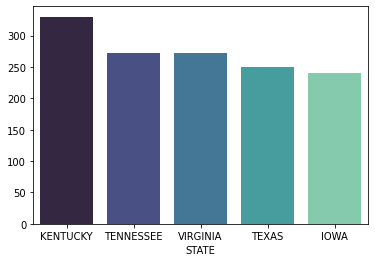

In [ ]:
cat_state_count = storms.groupby(['EVENT_CATEGORY','STATE']).count()
snow = cat_state_count['BEGIN_YEARMONTH']['Snow Storm'].nlargest(5)
#plt.bar(x.index, x.values)

sn.barplot(x = snow.index, y=snow.values, palette = 'mako')

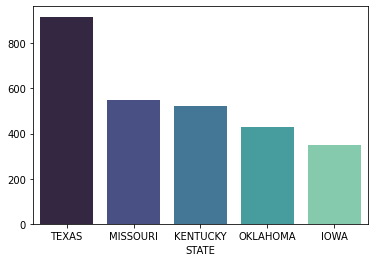

In [ ]:
cat_state_count = storms.groupby(['EVENT_CATEGORY','STATE']).count()
flood = cat_state_count['BEGIN_YEARMONTH']['Flood'].nlargest(5)
#plt.bar(x.index, x.values)

sn.barplot(x = flood.index, y=flood.values, palette = 'mako')

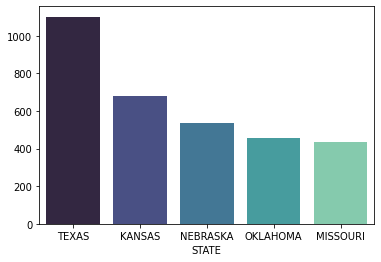

In [ ]:
cat_state_count = storms.groupby(['EVENT_CATEGORY','STATE']).count()
hail = cat_state_count['BEGIN_YEARMONTH']['Hail'].nlargest(5)
#plt.bar(x.index, x.values)

sn.barplot(x = hail.index, y=hail.values, palette = 'mako')

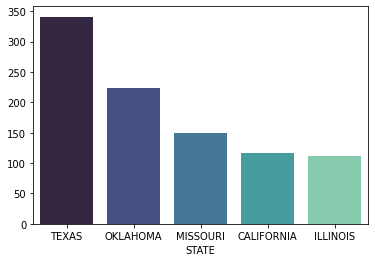

In [ ]:
cat_state_count = storms.groupby(['EVENT_CATEGORY','STATE']).count()
summer = cat_state_count['BEGIN_YEARMONTH']['Summer'].nlargest(5)
#plt.bar(x.index, x.values)

sn.barplot(x = summer.index, y=summer.values, palette = 'mako')

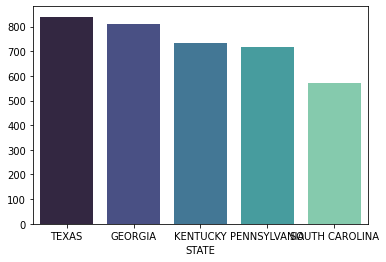

In [ ]:
cat_state_count = storms.groupby(['EVENT_CATEGORY','STATE']).count()
wind = cat_state_count['BEGIN_YEARMONTH']['Wind'].nlargest(5)
#plt.bar(x.index, x.values)

sn.barplot(x = wind.index, y=wind.values, palette = 'mako')

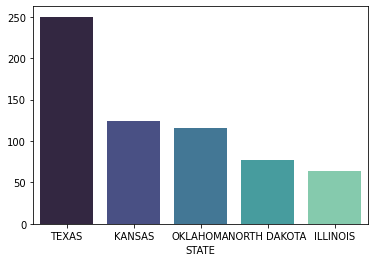

In [ ]:
cat_state_count = storms.groupby(['EVENT_CATEGORY','STATE']).count()
whirlwind = cat_state_count['BEGIN_YEARMONTH']['Whirlwind'].nlargest(5)
#plt.bar(x.index, x.values)

sn.barplot(x = whirlwind.index, y=whirlwind.values, palette = 'mako')

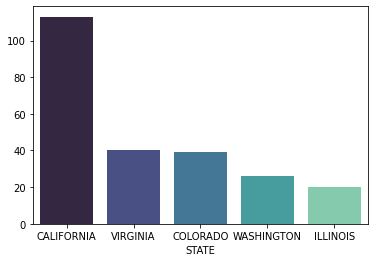

In [ ]:
cat_state_count = storms.groupby(['EVENT_CATEGORY','STATE']).count()
vision = cat_state_count['BEGIN_YEARMONTH']['Vision'].nlargest(5)
#plt.bar(x.index, x.values)

sn.barplot(x = vision.index, y=vision.values, palette = 'mako')

In [ ]:
states_event_count = storms.groupby(['STATE','EVENT_TYPE']).count()
states_event_count['BEGIN_YEARMONTH']

STATE    EVENT_TYPE             
ALABAMA  Cold/Wind Chill              8
         Dust Devil                   1
         Excessive Heat               1
         Extreme Cold/Wind Chill     11
         Flash Flood                 31
                                   ... 
WYOMING  Thunderstorm Wind           55
         Tornado                      8
         Wildfire                     1
         Winter Storm               137
         Winter Weather              10
Name: BEGIN_YEARMONTH, Length: 854, dtype: int64

STATE
NEW MEXICO    144
KENTUCKY      137
TEXAS         131
INDIANA       116
ILLINOIS      108
Name: BEGIN_YEARMONTH, dtype: int64


<BarContainer object of 5 artists>

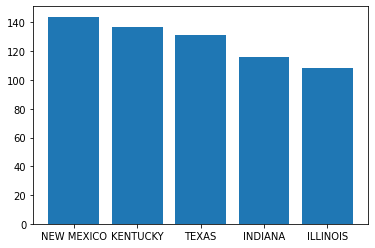

In [ ]:
event_states_count = storms.groupby(['EVENT_TYPE', 'STATE']).count()
x = event_states_count['BEGIN_YEARMONTH']['Heavy Snow'].nlargest(5)
plt.bar(x.index, x.values)

<BarContainer object of 5 artists>

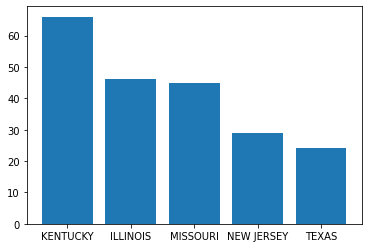

In [ ]:
event_states_count = storms.groupby(['EVENT_TYPE', 'STATE']).count()
x = event_states_count['BEGIN_YEARMONTH']['Heat'].nlargest(5)

plt.bar(x.index, x.values)

In [ ]:
snow_storm = ['Winter Storm','Heavy Snow', 'Blizzard', 'Lake-Effect Snow' ]
event_states_count['BEGIN_YEARMONTH'][snow_storm].sum()

4815

In [ ]:
winds

,ID,Year,Month,Day,Date,Time,Time zone,State,State FIPS number,State Number,Magnitude,Injuries,Fatalities,Loss,Cropp loss,Starting Latitude,Starting Longitude,Ending Lattitude,Ending Longitude,Length,Width,Number of States affected,State number,Tornado Segment number,1st County FIPS code,2nd County FIPS code,3rd County FIPS code,4th County FIPS code,Wind only
0,555384,2015,1,1,2015-01-01,14:08:00,3,GA,13,0,50,0,0,0.000,0.0,32.06,-81.16,32.06,,0,0,0,0,0,51,0,0,0,EG
1,555385,2015,1,1,2015-01-01,14:10:00,3,GA,13,0,50,0,0,0.000,0.0,32.01,-81.10,32.01,-81.1,0,0,0,0,0,51,0,0,0,EG
2,547892,2015,1,3,2015-01-03,03:15:00,3,TX,48,0,50,0,0,0.001,0.0,31.13,-93.99,31.13,-93.99,0,0,0,0,0,241,0,0,0,EG
3,549101,2015,1,3,2015-01-03,03:15:00,3,LA,22,0,52,0,0,0.000,0.0,32.42,-93.86,32.42,-93.86,0,0,0,0,0,17,0,0,0,EG
4,549102,2015,1,3,2015-01-03,03:15:00,3,LA,22,0,53,0,0,0.000,0.0,32.47,-93.80,32.47,-93.8,0,0,0,0,0,17,0,0,0,EG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13969,612837,2015,12,28,2015-12-28,10:30:00,3,FL,12,0,50,0,0,0.005,0.0,30.42,-87.30,30.42,-87.3,0,0,0,0,0,33,0,0,0,EG
13970,610530,2015,12,28,2015-12-28,14:25:00,3,FL,12,0,50,0,0,0.000,0.0,307667.00,-863772.00,307667.00,-863772,0,0,0,0,0,131,0,0,0,EG
13971,610527,2015,12,28,2015-12-28,14:30:00,3,AL,1,0,50,0,0,0.000,0.0,31104.00,-858886.00,31104.00,-858886,0,0,0,0,0,61,0,0,0,EG
13972,609929,2015,12,30,2015-12-30,11:51:00,3,SC,45,0,50,0,0,0.000,0.0,347347.00,-80774.00,347347.00,-80774,0,0,0,0,0,57,0,0,0,EG


In [ ]:
len(airports)

322

In [ ]:
airp_id = np.arange(1,323)
airports["airport_id"] = airp_id

In [ ]:
airports["dep_id"] = np.zeros(shape = (len(airports),))

In [ ]:
airports["arr_id"] = np.zeros(shape = (len(airports),))

In [ ]:
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,geometry,airport_id,dep_id,arr_id
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,POINT (-75.44040 40.65236),1,0.0,0.0
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,POINT (-99.68190 32.41132),2,0.0,0.0
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,POINT (-106.60919 35.04022),3,0.0,0.0
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,POINT (-98.42183 45.44906),4,0.0,0.0
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,POINT (-84.19447 31.53552),5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982,POINT (-132.36982 56.48433),318,0.0,0.0
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764,POINT (-111.11764 44.68840),319,0.0,0.0
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681,POINT (-94.30681 36.28187),320,0.0,0.0
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023,POINT (-139.66023 59.50336),321,0.0,0.0


In [ ]:
import networkx as nx

In [ ]:
G =nx.convert_matrix.from_pandas_edgelist(train, 'ORIGIN_AIRPORT',	'DESTINATION_AIRPORT', edge_attr='ARRIVAL_DELAY')


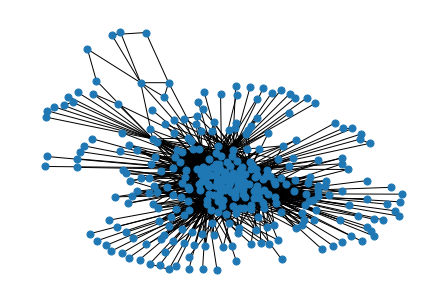

In [ ]:
nx.draw(G, node_size=50)

In [ ]:
train['origin_destination_airport'] = train['ORIGIN_AIRPORT'] + "_" + train['DESTINATION_AIRPORT']

In [ ]:
average_delay_per_trip_comb = train.groupby('origin_destination_airport').mean()['ARRIVAL_DELAY']

In [ ]:
len(average_delay_per_trip_comb )

4512

In [ ]:
average_delay_per_trip_comb.describe()

count    4512.000000
mean        6.295756
std        11.590958
min       -44.000000
25%         1.318153
50%         5.673605
75%         9.965851
max       381.000000
Name: ARRIVAL_DELAY, dtype: float64

In [ ]:
# 0 no delay, 1 delay
delayed_destinations = average_delay_per_trip_comb
delayed_destinations [delayed_destinations <= 0] = 0
delayed_destinations [delayed_destinations > 0] = 1
delayed_destinations

origin_destination_airport
ABE_ATL    1.0
ABE_DTW    1.0
ABE_ORD    1.0
ABI_DFW    1.0
ABQ_ATL    0.0
          ... 
XNA_ORD    1.0
XNA_SLC    0.0
YAK_CDV    0.0
YAK_JNU    0.0
YUM_PHX    1.0
Name: ARRIVAL_DELAY, Length: 4512, dtype: float64

In [ ]:
average_delay_origin = train.groupby('ORIGIN_AIRPORT').mean()['ARRIVAL_DELAY']
average_delay_origin.describe()

count    322.000000
mean       5.821437
std        5.515151
min      -20.678049
25%        3.005669
50%        5.740484
75%        9.055104
max       24.063158
Name: ARRIVAL_DELAY, dtype: float64

In [ ]:
# 0 no delay, 1 delay
delayed_dep = average_delay_origin
delayed_dep [delayed_dep <= 0] = 0
delayed_dep [delayed_dep > 0] = 1
delayed_dep

ORIGIN_AIRPORT
ABE    1.0
ABI    1.0
ABQ    1.0
ABR    1.0
ABY    1.0
      ... 
WRG    1.0
WYS    1.0
XNA    1.0
YAK    0.0
YUM    1.0
Name: ARRIVAL_DELAY, Length: 322, dtype: float64

In [ ]:
import matplotlib

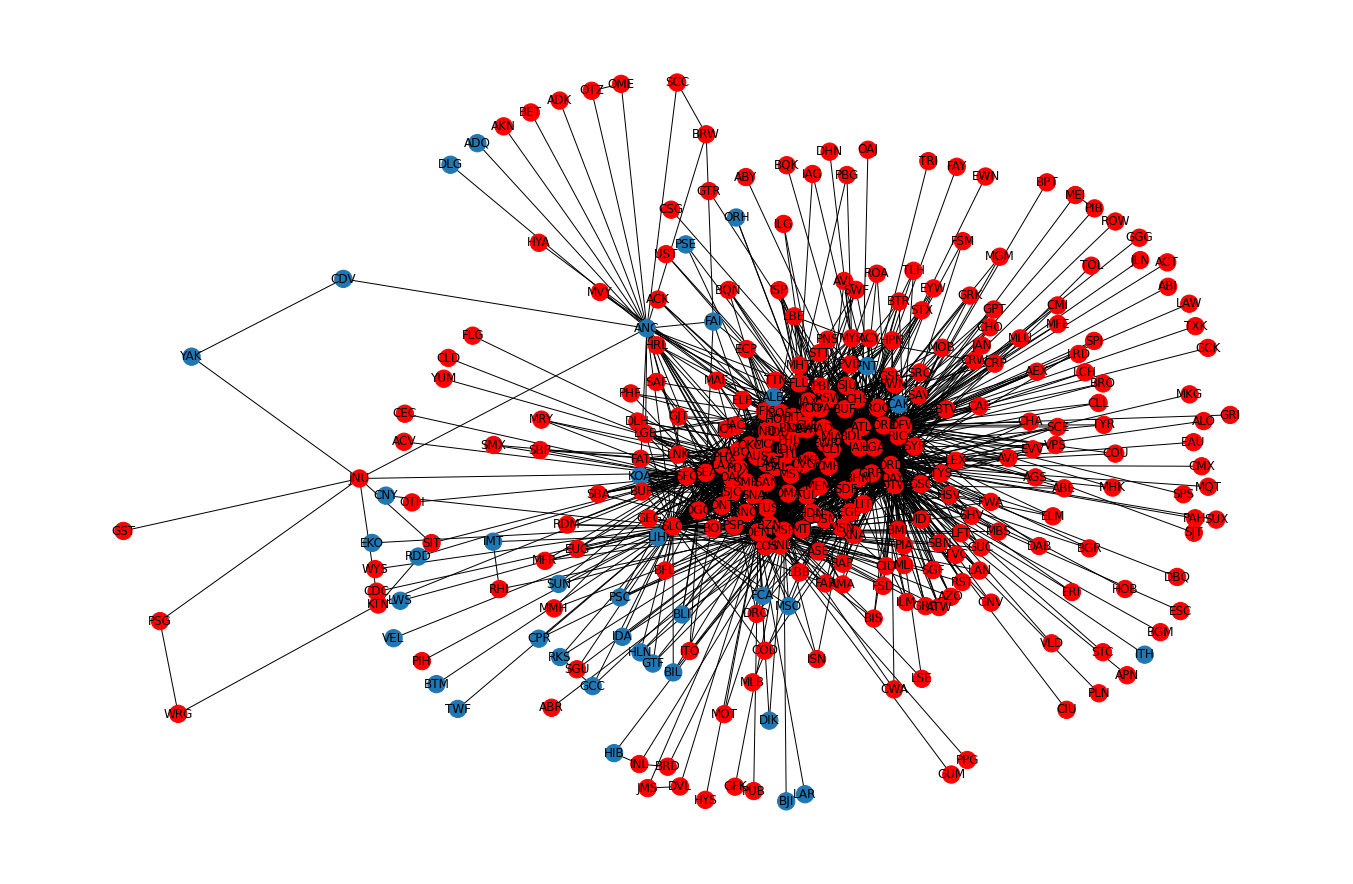

In [ ]:
fig, ax = plt.subplots(figsize=(24, 16))

# Create DF for node characteristics
carac = pd.DataFrame({'Airport':delayed_dep.index, 
                      'Delay_on_aver':delayed_dep.values})

# Create graph object

# Make types into categories
carac = carac.set_index('Airport')
carac = carac.reindex(G.nodes())

carac['Delay_on_aver'] = pd.Categorical(carac['Delay_on_aver'])
carac['Delay_on_aver'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['C0', 'red'])

# Draw graph
nx.draw(G, with_labels=True, node_color=carac['Delay_on_aver'].cat.codes, cmap = cmap)

In [ ]:
average_delay_destination = train.groupby('DESTINATION_AIRPORT').mean()['ARRIVAL_DELAY']
average_delay_destination.describe()

count    322.000000
mean       6.186209
std        4.820646
min      -13.761421
25%        4.124668
50%        6.420484
75%        8.617685
max       23.087571
Name: ARRIVAL_DELAY, dtype: float64

In [ ]:
# 0 no delay, 1 delay
delayed_arr = average_delay_destination
delayed_arr [delayed_arr <= 0] = 0
delayed_arr [delayed_arr > 0] = 1

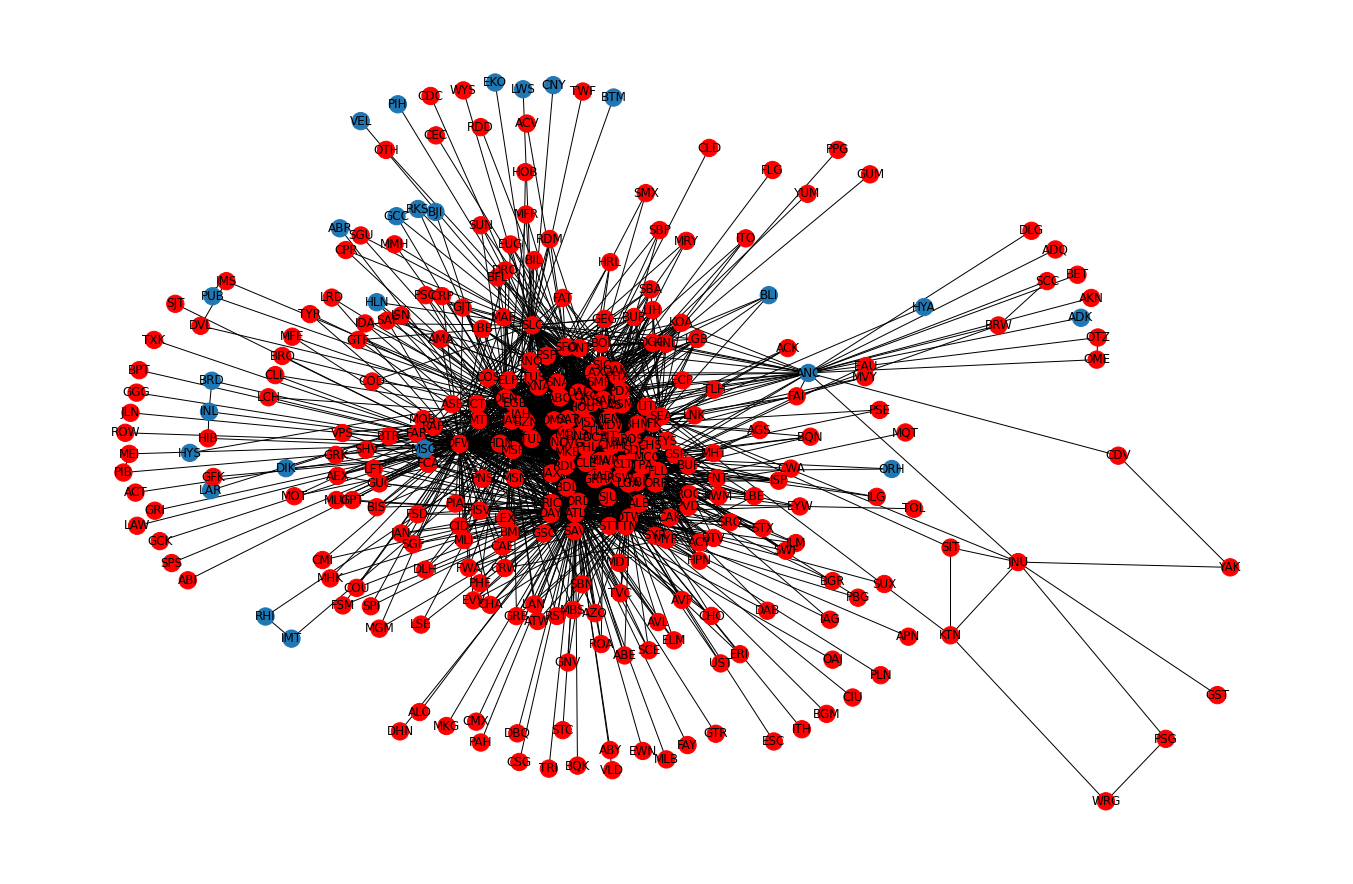

In [ ]:
fig, ax = plt.subplots(figsize=(24, 16))

# Create DF for node characteristics
carac = pd.DataFrame({'Airport':delayed_arr.index, 
                      'Delay_on_aver':delayed_arr.values})

# Create graph object

# Make types into categories
carac = carac.set_index('Airport')
carac = carac.reindex(G.nodes())

carac['Delay_on_aver'] = pd.Categorical(carac['Delay_on_aver'])
carac['Delay_on_aver'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['C0', 'red'])

# Draw graph
nx.draw(G, with_labels=True, node_color=carac['Delay_on_aver'].cat.codes, cmap = cmap)

In [ ]:
train.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,origin_destination_airport
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,ANC_SEA
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,LAX_PBI
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,SFO_CLT
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,LAX_MIA
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,SEA_ANC


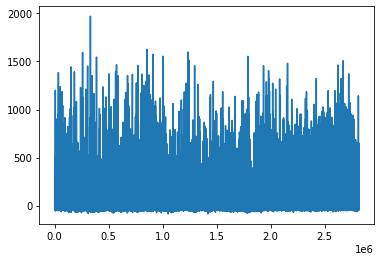

In [ ]:
plt.plot(train['ARRIVAL_DELAY'])

In [ ]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
id,1.000000,nan,0.985528,0.173830,-0.013538,-0.022173,0.011027,0.007774,-0.023178,0.005356,0.009609,0.018006,-0.013015,0.006280
YEAR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MONTH,0.985528,nan,1.000000,0.006911,-0.016513,-0.023036,0.005989,0.003218,-0.022875,0.000958,0.009965,0.018283,-0.016714,0.008731
DAY,0.173830,nan,0.006911,1.000000,0.013750,0.002520,-0.001760,-0.004189,-0.008257,-0.004660,-0.000863,-0.000039,-0.003578,-0.024166
DAY_OF_WEEK,-0.013538,nan,-0.016513,0.013750,1.000000,0.009782,0.008187,0.005875,-0.019184,0.004324,0.015228,0.016583,0.007960,-0.019053
FLIGHT_NUMBER,-0.022173,nan,-0.023036,0.002520,0.009782,1.000000,-0.004228,0.001510,0.039481,0.007754,-0.322563,-0.337287,-0.015716,0.017728
SCHEDULED_DEPARTURE,0.011027,nan,0.005989,-0.001760,0.008187,-0.004228,1.000000,0.964189,-0.008020,0.938907,-0.016488,-0.008196,0.718819,0.103083
DEPARTURE_TIME,0.007774,nan,0.003218,-0.004189,0.005875,0.001510,0.964189,1.000000,0.000728,0.972747,-0.020876,-0.015219,0.721558,0.164384
TAXI_OUT,-0.023178,nan,-0.022875,-0.008257,-0.019184,0.039481,-0.008020,0.000728,1.000000,0.026827,0.111012,0.069282,0.011364,0.238806
WHEELS_OFF,0.005356,nan,0.000958,-0.004660,0.004324,0.007754,0.938907,0.972747,0.026827,1.000000,-0.027731,-0.025878,0.731761,0.160181


In [ ]:
a = train[['MONTH','DAY_OF_WEEK','SCHEDULED_DEPARTURE','DEPARTURE_TIME','TAXI_OUT','WHEELS_OFF','DISTANCE','ARRIVAL_DELAY']]
a

,MONTH,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,ARRIVAL_DELAY
0,1,4,5,2354.0,21.0,15.0,1448,-22.0
1,1,4,10,2.0,12.0,14.0,2330,-9.0
2,1,4,20,18.0,16.0,34.0,2296,5.0
3,1,4,20,15.0,15.0,30.0,2342,-9.0
4,1,4,25,24.0,11.0,35.0,1448,-21.0
...,...,...,...,...,...,...,...,...
2818548,6,2,2359,2358.0,11.0,9.0,1744,-8.0
2818549,6,2,2359,129.0,11.0,140.0,1379,79.0
2818550,6,2,2359,152.0,8.0,200.0,1825,107.0
2818551,6,2,2359,12.0,12.0,24.0,1874,9.0


In [ ]:
import seaborn as sns

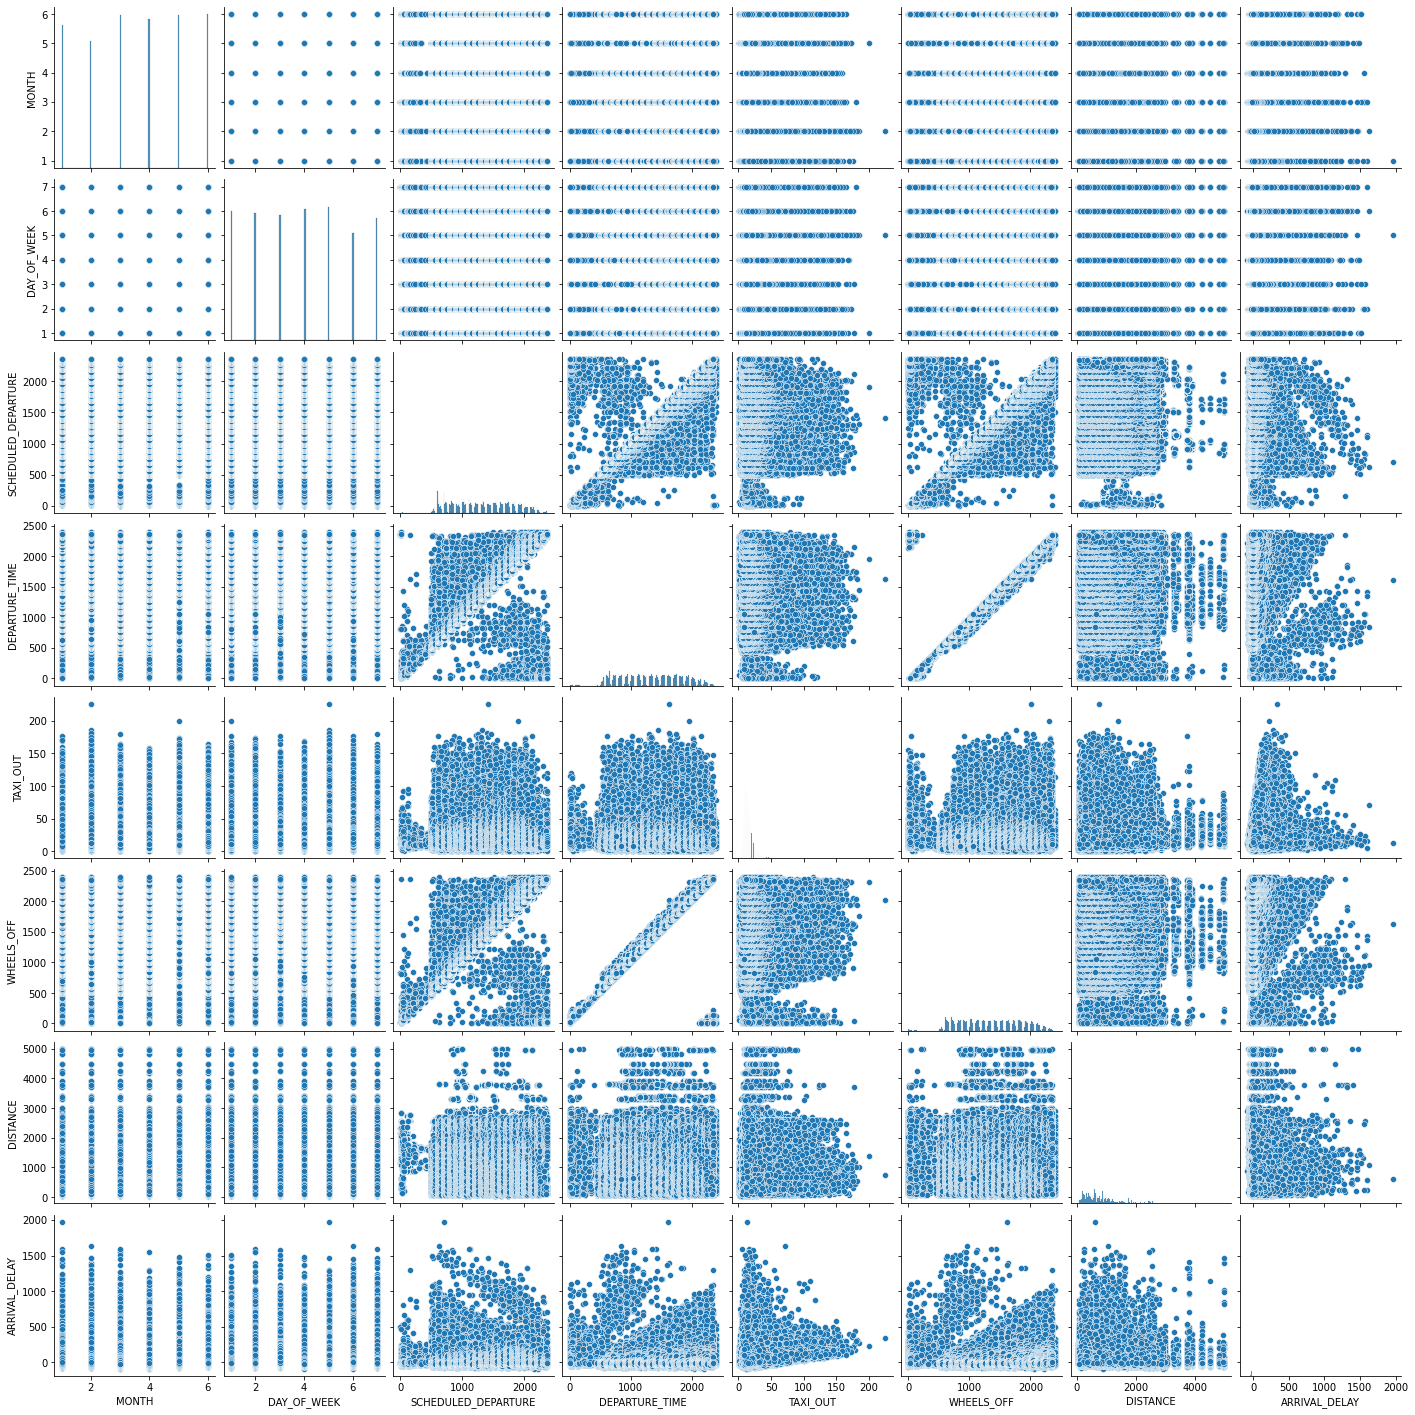

In [ ]:
sns.pairplot(a)

In [ ]:
train.isnull().values.any()

False

In [ ]:
Q1 = train.ARRIVAL_DELAY.quantile(.25)
Q3 = train.ARRIVAL_DELAY.quantile(.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR # lower bound for data to not be considered as outliers
UB = Q3 + 1.5*IQR # upper bound
train_out = train[(train.ARRIVAL_DELAY > LB) & (train.ARRIVAL_DELAY < UB)]
train_out # training set without outliers

dep = (train_out.DEPARTURE_TIME-train_out.DEPARTURE_TIME%100)*60/100 + train_out.DEPARTURE_TIME%100
sch = (train_out.SCHEDULED_DEPARTURE-train_out.SCHEDULED_DEPARTURE%100)*60/100 + train_out.SCHEDULED_DEPARTURE%100

# the difference 
dif = pd.DataFrame(dep - sch)

def dep_del(dataset):
    dep = (dataset.DEPARTURE_TIME-dataset.DEPARTURE_TIME%100)*60/100 + dataset.DEPARTURE_TIME%100
    sch = (dataset.SCHEDULED_DEPARTURE-dataset.SCHEDULED_DEPARTURE%100)*60/100 + dataset.SCHEDULED_DEPARTURE%100

    # the difference 
    dif = pd.DataFrame(dep - sch)
    
    dif[abs(dif) > 720] = np.sign(dif[abs(dif) > 720])*(abs(dif[abs(dif) > 720]) - 1440)
    diff = dif.rename({0: 'DEPARTURE_DELAY'}, axis = 1)
    train_dep = dataset.join(diff)
    return train_dep

train_dep = dep_del(train_out)

train_d = dep_del(train)

test_d = dep_del(test)

In [ ]:
def dep_delay(dataset):
    dep = (dataset.DEPARTURE_TIME-dataset.DEPARTURE_TIME%100)*60/100 + dataset.DEPARTURE_TIME%100
    sch = (dataset.SCHEDULED_DEPARTURE-dataset.SCHEDULED_DEPARTURE%100)*60/100 + dataset.SCHEDULED_DEPARTURE%100

    # the difference 
    dif = pd.DataFrame(dep - sch)
    
    dif[abs(dif) > 720] = np.sign(dif[abs(dif) > 720])*(abs(dif[abs(dif) > 720]) - 1440)
    dif[dif < -90] = dif[dif < -90] + 1440
    diff = dif.rename({0: 'DEPARTURE_DELAY'}, axis = 1)
    train_dep = dataset.join(diff)
    return train_dep

train_delay = dep_delay(train)

test_del = dep_delay(test)

traindelay = train_delay[400 + train_delay.DEPARTURE_DELAY > train_delay.ARRIVAL_DELAY]

In [ ]:
from sklearn.linear_model import LinearRegression

X = traindelay["DEPARTURE_DELAY"].values
Y = traindelay["ARRIVAL_DELAY"].values

model = LinearRegression()
model.fit(X[:, np.newaxis], Y)

xfit2 = test_del['DEPARTURE_DELAY'].values

yfit2 = model.predict(xfit2[:, np.newaxis])
yfit2

array([33.92804172, -9.41850665, -9.41850665, ..., -8.41044739,
        0.66208599, -6.39432886])

In [ ]:
X = X.reshape(1, -1)
Y = Y.reshape(1, -1)

In [ ]:
X = traindelay["DEPARTURE_DELAY"].values
Y = traindelay["ARRIVAL_DELAY"].values

In [ ]:
X.shape

(2818524,)

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model = SVR(kernel = 'rbf') #, C=100, gamma=0.1, epsilon=0.1)
model.fit(X[:, np.newaxis], Y.ravel())

xfit2 = test_del['DEPARTURE_DELAY'].values #test x values

yfit2 = model.predict(xfit2[:, np.newaxis])
yfit2

In [ ]:
yfit2.sum()

0.0

In [ ]:
X.shape

(1, 2818524)

In [ ]:
Y.shape

(1, 2818524)

In [ ]:
#svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
#svr_lin = SVR(kernel="linear", C=100, gamma="auto")
#svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)